1. Création du signal synthétique

Un signal synthétique est un signal créé par calcul mathématique — par exemple en utilisant des fonctions comme sin() ou cos() au lieu d’un son réel enregistré.


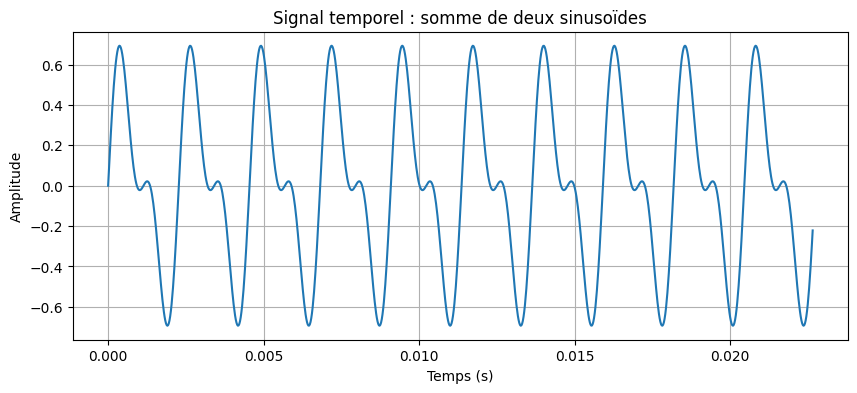

Fichier 'signal_synthetique.wav' créé avec succès.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# --- Paramètres du signal ---
fs = 44100           # fréquence d'échantillonnage (Hz)
duration = 2         # durée en secondes
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# --- Signal composé de deux sinusoïdes ---
x = 0.5 * np.sin(2*np.pi*440*t) + 0.3 * np.sin(2*np.pi*880*t)

# --- Affichage temporel ---
plt.figure(figsize=(10,4))
plt.plot(t[:1000], x[:1000])  # zoom sur 1000 points
plt.title("Signal temporel : somme de deux sinusoïdes")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# --- Sauvegarde au format WAV ---
sf.write("signal_synthetique.wav", x, fs)
print("Fichier 'signal_synthetique.wav' créé avec succès.")

Commentaires :
1) On crée deux sons purs de 440 Hz et 880 Hz.
2) Le signal résultant est une superposition de deux fréquences.
cad le son final que tu as créé est composé de deux ondes (ou sons) mélangées ensemble.

Chaque fréquence = une onde sonore
- Une fréquence (ex. 440 Hz) correspond à une onde sinusoïdale :
elle monte et descend 440 fois par seconde.
- Une autre fréquence (ex. 880 Hz) est une autre onde qui vibre deux fois plus vite.

En code :

x1 = 0.5 * np.sin(2*np.pi*440*t)   # onde 1 → 440 Hz

x2 = 0.3 * np.sin(2*np.pi*880*t)   # onde 2 → 880 Hz

x = x1 + x2                        # superposition

3) On l’enregistre sous format .wav avec soundfile.





2. Manipulation et statistiques du signal

In [2]:
import numpy.ma as ma

# --- Calculs statistiques ---
moyenne = np.mean(x)
variance = np.var(x)
ecart_type = np.std(x)
val_min, val_max = np.min(x), np.max(x)

print(f"Moyenne : {moyenne:.5f}")
print(f"Variance : {variance:.5f}")
print(f"Écart-type : {ecart_type:.5f}")
print(f"Valeurs min/max : {val_min:.3f}, {val_max:.3f}")

# --- Normalisation entre -1 et 1 ---
x_norm = x / np.max(np.abs(x))

# --- Masquage des faibles valeurs ---
mask = ma.masked_less(x_norm, 0.05)
print(f"Nombre de valeurs masquées : {mask.mask.sum()}")


Moyenne : -0.00000
Variance : 0.17000
Écart-type : 0.41231
Valeurs min/max : -0.694, 0.694
Nombre de valeurs masquées : 54800


Commentaires :

- On applique les fonctions mean(), var(), std() vues au TP1.

- La normalisation garantit que le signal reste dans l’intervalle [-1, 1].

- Le masquage ignore les petites amplitudes (< 0.05), utile pour réduire le bruit.

3. Analyse fréquentielle (FFT)

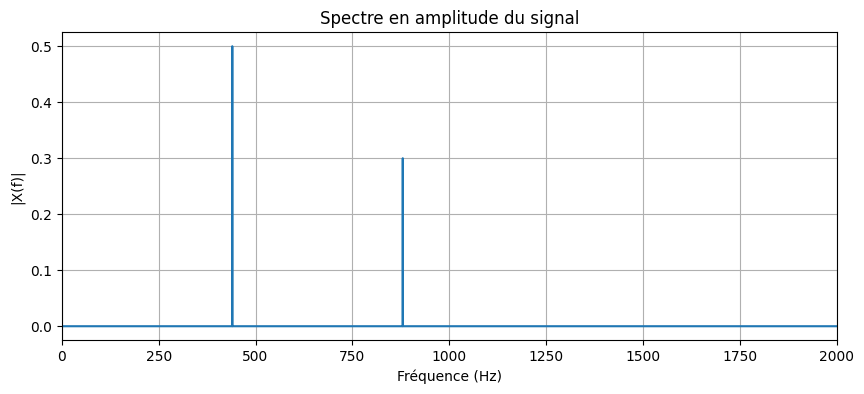

Pic à 440.0 Hz, amplitude = 0.500
Pic à 880.0 Hz, amplitude = 0.300
Pic à 3384.0 Hz, amplitude = 0.000
Pic à 1624.0 Hz, amplitude = 0.000
Pic à 2944.0 Hz, amplitude = 0.000


In [3]:
from numpy.fft import fft, fftfreq

# --- Calcul de la FFT ---
N = len(x)
X = fft(x)
freq = fftfreq(N, d=1/fs)

# --- Partie positive du spectre ---
X_abs = np.abs(X[:N//2]) * 2 / N
freq_pos = freq[:N//2]

# --- Tracé du spectre ---
plt.figure(figsize=(10,4))
plt.plot(freq_pos, X_abs)
plt.title("Spectre en amplitude du signal")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("|X(f)|")
plt.xlim(0, 2000)  # affichage limité à 2000 Hz
plt.grid(True)
plt.show()

# --- Recherche des pics principaux ---
pic_indices = np.argsort(X_abs)[-5:][::-1]  # 5 plus grandes amplitudes
for i in pic_indices:
    print(f"Pic à {freq_pos[i]:.1f} Hz, amplitude = {X_abs[i]:.3f}")


Commentaires :

- On utilise numpy.fft pour transformer le signal dans le domaine fréquentiel.
- Les pics principaux apparaissent autour de 440 Hz et 880 Hz, confirmant la composition du signal.
- Le spectre est symétrique, mais on ne garde que la moitié positive.

4. Lecture et information du fichier audio

In [4]:
# Lecture du fichier créé
y, Fs = sf.read("signal_synthetique.wav")

# --- Informations ---
info = {
    "Nom du fichier": "signal_synthetique.wav",
    "Fréquence d'échantillonnage": Fs,
    "Nombre d'échantillons": y.shape[0],
    "Durée (s)": y.shape[0] / Fs,
    "Canaux": y.shape[1] if len(y.shape) > 1 else 1
}

for k, v in info.items():
    print(f"{k} : {v}")

Nom du fichier : signal_synthetique.wav
Fréquence d'échantillonnage : 44100
Nombre d'échantillons : 88200
Durée (s) : 2.0
Canaux : 1
